In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Title of the dataset
title = "Intruder Detection Dataset"
print(f"Title: {title}\n")

# Load the dataset from a CSV file
data = pd.read_csv("data.csv")
display(data)  # Display the first few rows of the dataset
  

Title: Intruder Detection Dataset



,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Targets
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Targets
Area,1.000000e+00,3.095077e-16,3.095077e-16,-1.162999e-16,-0.423438
Sensing Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Transmission Range,3.095077e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Sensor nodes,-1.162999e-16,1.000000e+00,1.000000e+00,1.000000e+00,0.838365
Number of Targets,-4.234383e-01,8.383655e-01,8.383655e-01,8.383655e-01,1.000000


<Axes: >

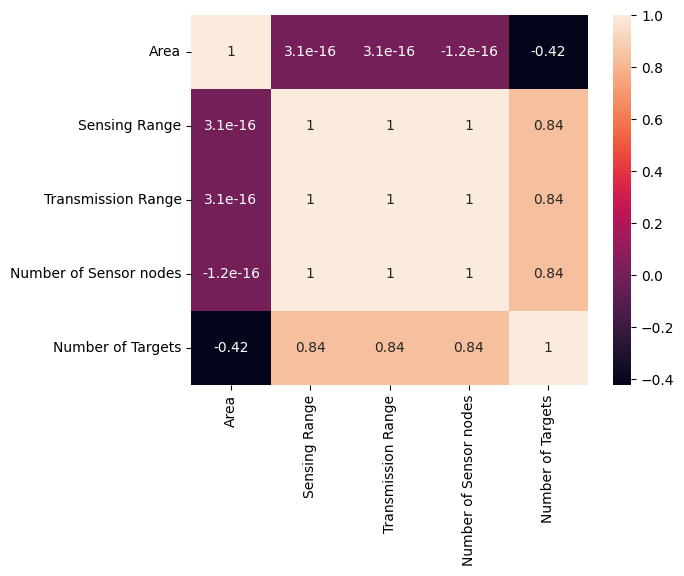

In [12]:
# Separate the features (X) from the target (y)
X = data.drop(columns=[data.columns[-1]])  # Drop the last column (target)
y = data["Number of Targets"]  # Target variable

# Calculate and display the correlation matrix
map = data.corr()
display(map)
sns.heatmap(map, annot=True, fmt=".2g")  # Plot the heatmap for the correlation matrix
 

In [15]:
X = data.drop(columns=[data.columns[-1]])  # Drop the last column (target)
y = data["Number of Targets"]  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)  # Fit the model using all data

# Make predictions on the training and testing sets
y_pred_train = model.predict(y_train)
y_pred_test = model.predict(y_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)  # Root Mean Squared Error (RMSE) for training
r2_train = r2_score(y_train, y_pred_train)  # R² score for training

# Calculate the MSE and R² for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)  # RMSE for testing
r2_test = r2_score(y_test, y_pred_test)  # R² score for testing

# Print model coefficients and metrics
print("\nMulti-Variable Regression:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}\n")

# Print training set metrics
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R-squared: {r2_train}\n")

# Print testing set metrics
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}\n")

# Plot the predictions vs actual values for the test set
plt.title("Target Prediction using Multi-variate Linear Regression")
plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, color='red')  # Line representing perfect predictions
plt.grid(True)
plt.show()

# Predict the number of targets for a new data point
y_new = model.predict([[60000, 45, 100, 500]])
print("New predicted value of number of targets:", y_new)
 

C:\Users\JAI RAHUL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.